In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import shap
from sklearn.feature_selection import RFECV
import xgboost as xgb

D:\App\Anaconda3\envs\test\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#读数据标准化划分数据集
df = pd.read_csv('../my_data.csv')
X = df.iloc[:, 1:58]
Y = df.iloc[:, 58:]
Y=Y['SLME @ 5um']
names=df.columns
names=['SHAP value of '+x for x in names]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
print("X_train's shape is", X_train.shape,"; y_train's shape is", y_train.shape)
print("X_test's shape is", X_test.shape,"; y_test's shape is",y_test.shape)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_stand = scaler.transform(X_train)
X_test_stand = scaler.transform(X_test)

X_train's shape is (390, 57) ; y_train's shape is (390,)
X_test's shape is (98, 57) ; y_test's shape is (98,)


In [3]:
##best select model##
xgb_regressor = xgb.sklearn.XGBRegressor(n_estimators=100,
                                         colsample_bytree=0.5,
                                         gamma=0,
                                         learning_rate=0.2,
                                         max_depth=5,
                                         min_child_weight=6,
                                         reg_alpha=0,
                                         reg_lambda=1,
                                         subsample=0.7)

model = xgb_regressor

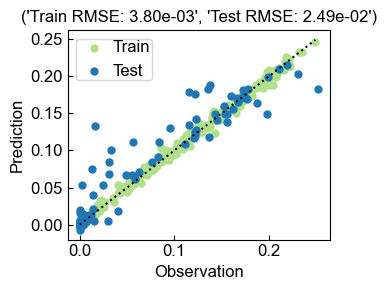

In [4]:
####fit and predict###
xgb_regressor.fit(X_train_stand, y_train)
y_train_hat = xgb_regressor.predict(X_train_stand)
y_test_hat = xgb_regressor.predict(X_test_stand)

# 将数据保存为 CSV 文件
train_df = pd.DataFrame({'y_train': y_train, 'y_train_hat': y_train_hat})
train_df.to_csv('./RMSE/SLME_train_noRFE.csv', index=False)

test_df = pd.DataFrame({'y_test': y_test, 'y_test_hat': y_test_hat})
test_df.to_csv('./RMSE/SLME_test_noRFE.csv', index=False)

###plot#####
fontsize = 12
plt.figure(figsize=(3.5,3))
plt.style.use('default')
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rcParams['font.family']="Arial"
a = plt.scatter(y_train, y_train_hat, s=25,c='#b2df8a')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k:', lw=1.5)
plt.xlabel('Observation', fontsize=fontsize)
plt.ylabel('Prediction', fontsize=fontsize)
plt.tick_params(direction='in')
plt.title(('Train RMSE: {:.2e}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_hat))),\
               'Test RMSE: {:.2e}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_hat)))), fontsize=fontsize)
b = plt.scatter(y_test, y_test_hat, s=25,c='#1f78b4')
plt.legend((a,b),('Train','Test'),fontsize=fontsize,handletextpad=0.1,borderpad=0.1)
plt.rcParams['font.family']="Arial"
plt.tight_layout()
plt.show()

In [5]:
import sklearn.metrics as metrics
from scipy.stats.stats import pearsonr

# Defining Metrics
def R2Score(X,Y):
    r2=metrics.r2_score(X,Y)
    return r2
#计算R²分数（R-squared score），也被称为决定系数，它衡量了回归模型对目标变量的方差解释比例。
#参数 X 和 Y 是两个数组，分别表示模型的预测值和实际目标值。

def PearsonCoefficient(X, Y):
    corr, _ = pearsonr(X,Y)
    return corr
#计算Pearson相关系数，衡量了两个变量之间的线性关系强度和方向。

In [6]:
PearsonCoefficient(y_test,y_test_hat)

0.9478365626694436

In [7]:
PearsonCoefficient(y_train,y_train_hat)

0.9987897632814914

In [8]:
R2Score(y_test,y_test_hat)

0.8879781641628164

In [9]:
R2Score(y_train,y_train_hat)

0.997555441954153